In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Perceptron    # Used for simple linear classification tasks.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.models import Sequential     # Sequential lets you build a neural network layer-by-layer in Keras.

from tensorflow.keras.layers import Dense     #Dense makes the final predictions
from tensorflow.keras.layers import Conv2D     # Conv2D extracts features
from tensorflow.keras.layers import Flatten    # Flatten reshapes them

from tensorflow.keras.layers import MaxPooling2D     # MaxPooling2D reduces size
from tensorflow.keras.layers import Dropout          # Dropout prevents overfitting

from tensorflow.keras.utils import to_categorical     # converts numeric class labels into one-hot encoded format for training classification models


In [ ]:
df = pd.read_csv("mnist_train.csv")
df_test = pd.read_csv("mnist_test.csv")

# Drop rows with any missing values
df.dropna(inplace=True)
df_test.dropna(inplace=True)

In [ ]:
df.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(59999, 785)

In [ ]:
df.columns

Index(['5', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.608', '0.609', '0.610', '0.611', '0.612', '0.613', '0.614', '0.615',
       '0.616', '0.617'],
      dtype='object', length=785)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 785 entries, 5 to 0.617
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
df.isnull().sum()

,0
5,0
0,0
0.1,0
0.2,0
0.3,0
...,...
0.613,0
0.614,0
0.615,0
0.616,0


In [ ]:
X_train = df.drop('5', axis=1).values
y_train = df['5'].values
X_test = df_test.drop('7', axis=1).values
y_test = df_test['7'].values

In [ ]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [ ]:
X_train_img = X_train.reshape(-1, 28, 28)
X_test_img = X_test.reshape(-1, 28, 28)


In [ ]:
X_train_img

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

In [ ]:
perceptron=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'), # Changed activation to relu
    Dense(10,activation='softmax'), # Added a Dense layer with 10 units for the output
])

In [ ]:
perceptron.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
acc_percp = perceptron.evaluate(X_test_img, y_test_encoded, verbose=0)[1]
acc_percp


0.12521252036094666

In [ ]:
history_percp = perceptron.fit(X_train_img, y_train_encoded, epochs=5, batch_size=32, validation_data=(X_test_img, y_test_encoded), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7401 - loss: 1.0352 - val_accuracy: 0.9009 - val_loss: 0.3610
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9013 - loss: 0.3571 - val_accuracy: 0.9162 - val_loss: 0.2951
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9147 - loss: 0.3010 - val_accuracy: 0.9246 - val_loss: 0.2640
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9270 - loss: 0.2595 - val_accuracy: 0.9321 - val_loss: 0.2411
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9312 - loss: 0.2443 - val_accuracy: 0.9355 - val_loss: 0.2244


In [ ]:
#ANN
ann = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])


In [ ]:
ann.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
acc_ann = ann.evaluate(X_test_img, y_test_encoded, verbose=0)[1]


In [ ]:
acc_ann

0.11221121996641159

In [ ]:
history_ann = ann.fit(X_train_img, y_train_encoded, epochs=5, batch_size=32, validation_data=(X_test_img, y_test_encoded), verbose=1)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8809 - loss: 0.4189 - val_accuracy: 0.9604 - val_loss: 0.1273
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9671 - loss: 0.1072 - val_accuracy: 0.9739 - val_loss: 0.0838
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9782 - loss: 0.0674 - val_accuracy: 0.9743 - val_loss: 0.0827
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9851 - loss: 0.0483 - val_accuracy: 0.9735 - val_loss: 0.0840
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9877 - loss: 0.0394 - val_accuracy: 0.9754 - val_loss: 0.0801


In [ ]:
X_train_cnn = X_train.reshape(-1, 28, 28,1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

In [ ]:
cnn = Sequential([
    Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

In [ ]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history_cnn = cnn.fit(X_train_cnn, y_train_encoded, epochs=5, batch_size=32, validation_data=(X_test_cnn, y_test_encoded), verbose=1)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.8634 - loss: 0.4208 - val_accuracy: 0.9831 - val_loss: 0.0482
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9758 - loss: 0.0812 - val_accuracy: 0.9880 - val_loss: 0.0348
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9838 - loss: 0.0567 - val_accuracy: 0.9874 - val_loss: 0.0410
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9865 - loss: 0.0472 - val_accuracy: 0.9912 - val_loss: 0.0254
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9885 - loss: 0.0378 - val_accuracy: 0.9918 - val_loss: 0.0263


In [ ]:
acc_cnn = cnn.evaluate(X_test_cnn, y_test_encoded, verbose=0)[1]
acc_cnn


0.9917991757392883

In [ ]:
def plot_training(history, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Val")
    plt.title(f"{title} Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Val")
    plt.title(f"{title} Loss")
    plt.legend()
    plt.show()

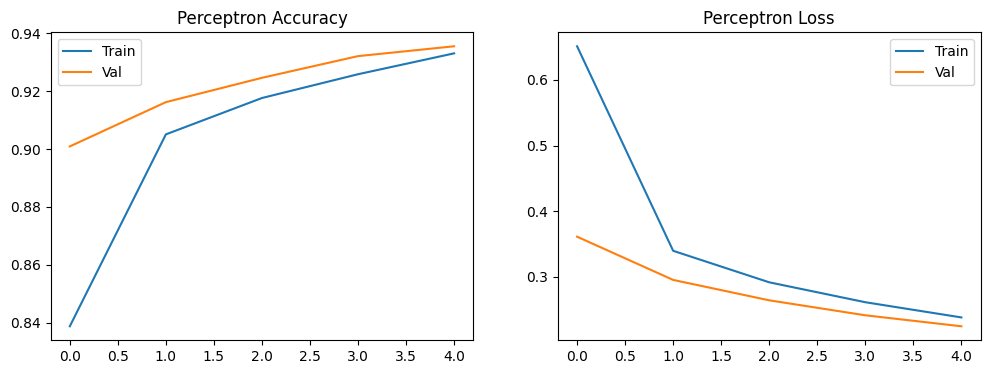

In [ ]:
plot_training(history_percp, "Perceptron")

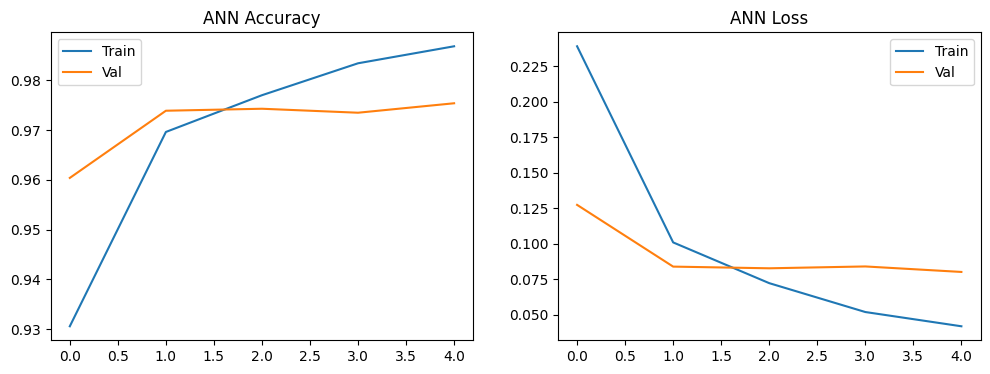

In [ ]:
plot_training(history_ann, "ANN")


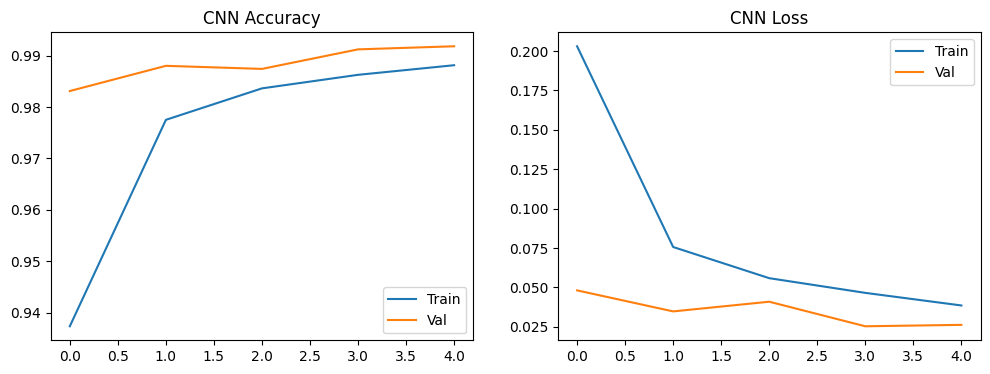

In [ ]:
plot_training(history_cnn, "CNN")

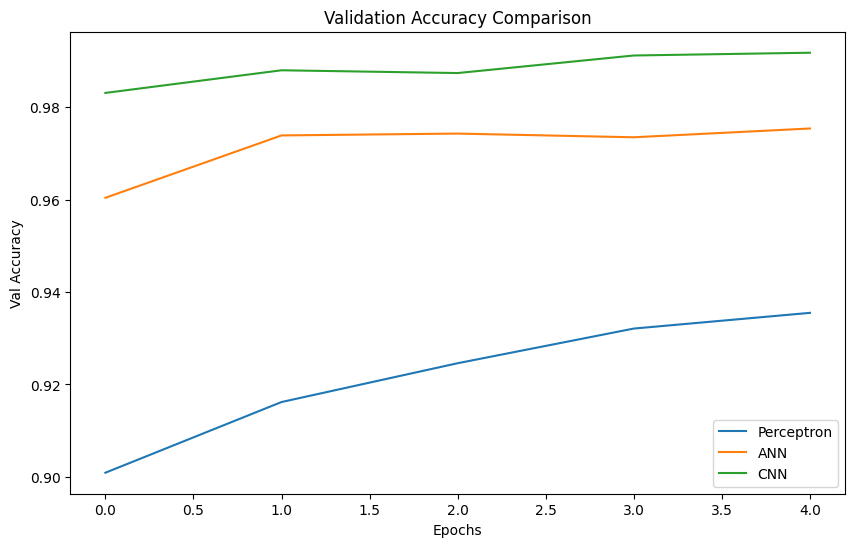

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history_percp.history['val_accuracy'], label="Perceptron")
plt.plot(history_ann.history['val_accuracy'], label="ANN")
plt.plot(history_cnn.history['val_accuracy'], label="CNN")
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")
plt.legend()
plt.show()

In [ ]:
def show_side_by_side(models, model_names, X, X_cnn, y_true, n=5):
    idxs = np.random.choice(len(X), n, replace=False)
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(idxs):
        plt.subplot(2, n, i+1)
        plt.imshow(X[idx].reshape(28, 28), cmap="gray")
        plt.axis("off")
        plt.title(f"True: {y_true[idx]}")
        preds = [np.argmax(model.predict(X_cnn[idx].reshape(1, 28, 28, 1) if name == "CNN" else X[idx].reshape(1, 28, 28)))
                 for model, name in zip(models, model_names)]
        plt.subplot(2, n, n+i+1)
        plt.axis("off")
        plt.title("\n".join(f"{n}: {p}" for n, p in zip(model_names, preds)))
    plt.tight_layout()
    plt.show()


In [ ]:
show_side_by_side([perceptron, ann, cnn], ["Perceptron", "ANN", "CNN"], X_test_img, X_test_cnn, y_test, 5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [ ]:
y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis=1)
cm = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
final_accs = [acc_percp*100, acc_ann*100, acc_cnn*100]
models = ["Perceptron", "ANN", "CNN"]

plt.figure(figsize=(8,6))
bars = plt.bar(models, final_accs, color=['#ff9999','#66b3ff','#99ff99'])
plt.title("Final Test Accuracy Comparison")
plt.ylabel("Accuracy (%)")
for bar, acc in zip(bars, final_accs):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()-1, f"{acc:.2f}%",
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.ylim(80, 100)
plt.show()
